In [1]:
import warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# Set the base as per your system
base_path = "/Users/Pratik/Data"
data_path = base_path + "/banksim1/bs140513_032310.csv"
raw_data = pd.read_csv(data_path)
raw_cols = raw_data.columns
total_row_count = len(raw_data.index)
print("List of columns: {}".format(raw_cols))
print("Total row count: {}".format(total_row_count))

fraud_data = raw_data[raw_data["fraud"] == 1]
fraud_row_count = len(fraud_data.index)
print("Fraud row count: {}".format(fraud_row_count))

valid_data = raw_data[raw_data["fraud"] == 0]
valid_row_count = len(valid_data.index)
print("Fraud row count: {}".format(valid_row_count))

List of columns: Index(['step', 'customer', 'age', 'gender', 'zipcodeOri', 'merchant',
       'zipMerchant', 'category', 'amount', 'fraud'],
      dtype='object')
Total row count: 594643
Fraud row count: 7200
Fraud row count: 587443


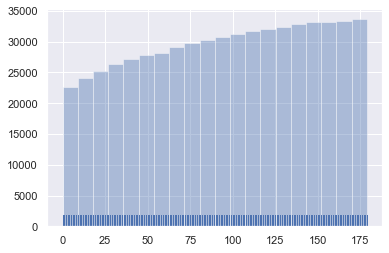

In [3]:
ax = sns.distplot(raw_data["step"].values, bins=20, kde=False, rug=True)

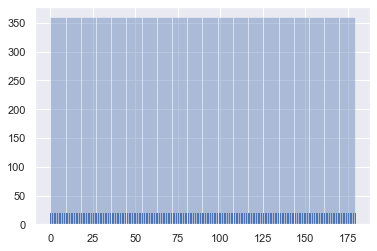

In [4]:
ax = sns.distplot(fraud_data["step"].values, bins=20, kde=False, rug=True)

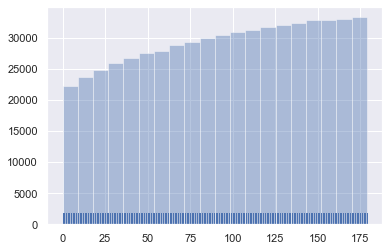

In [5]:

ax = sns.distplot(valid_data["step"].values, bins=20, kde=False, rug=True)

In [6]:
cus_0 = fraud_data["customer"].values[0]
merch_0 = fraud_data["merchant"].values[0]

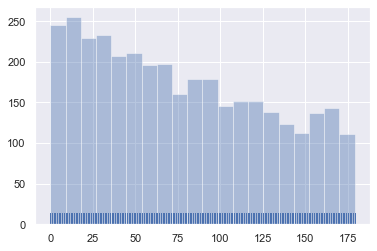

In [7]:
ax = sns.distplot(raw_data[raw_data["merchant"] == merch_0]["step"].values, bins=20, kde=False, rug=True)

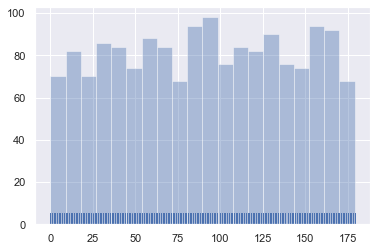

In [8]:
ax = sns.distplot(fraud_data[fraud_data["merchant"] == merch_0]["step"].values,bins=20, kde=False, rug=True)

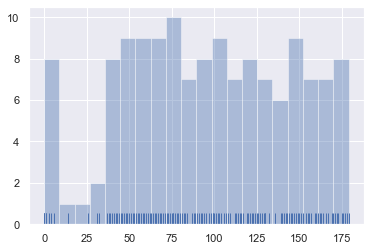

In [9]:
ax = sns.distplot(raw_data[raw_data["customer"] == cus_0]["step"].values, bins=20, kde=False, rug=True)

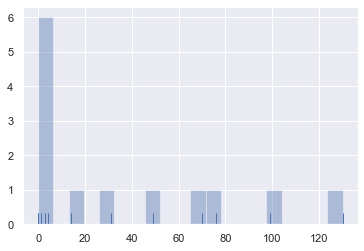

In [10]:
ax = sns.distplot(fraud_data[fraud_data["customer"] == cus_0]["step"].values, bins=20, kde=False, rug=True)

### NOTE
In the below cells column `fraud` is used to count the number of rows, this does not signify actual fraud transaction class.

In [43]:
cus_grp = pd.DataFrame(valid_data[["customer", "fraud"]].groupby("customer")\
                       .agg({"customer": "first","fraud": "count"}))

valid_max_cus = cus_grp[cus_grp["fraud"] == cus_grp["fraud"].max()]["customer"].values[0]
valid_least_cus = cus_grp[cus_grp["fraud"] == cus_grp["fraud"].min()]["customer"].values[0]

merch_grp = pd.DataFrame(valid_data[["merchant", "fraud"]].groupby("merchant")\
                       .agg({"merchant": "first","fraud": "count"}))

valid_max_merch = merch_grp[merch_grp["fraud"] == merch_grp["fraud"].max()]["merchant"].values[0]
valid_least_merch = merch_grp[merch_grp["fraud"] == merch_grp["fraud"].min()]["merchant"].values[0]

print("Customer with max number of valid transaction: {0}".format(valid_max_cus))
print("Customer with least number of valid transaction: {0}".format(valid_least_cus))
print("Merchant with max number of valid transaction: {0}".format(valid_max_merch))
print("Merchant with least number of valid transaction: {0}".format(valid_least_merch))

Customer with max number of valid transaction: 'C980876590'
Customer with least number of valid transaction: 'C1809646275'
Merchant with max number of valid transaction: 'M1823072687'
Merchant with least number of valid transaction: 'M1726401631'


In [44]:
cus_grp = pd.DataFrame(fraud_data[["customer", "fraud"]].groupby("customer")\
                       .agg({"customer": "first","fraud": "count"}))

frad_max_cus = cus_grp[cus_grp["fraud"] == cus_grp["fraud"].max()]["customer"].values[0]
frad_least_cus = cus_grp[cus_grp["fraud"] == cus_grp["fraud"].min()]["customer"].values[0]

merch_grp = pd.DataFrame(fraud_data[["merchant", "fraud"]].groupby("merchant")\
                       .agg({"merchant": "first","fraud": "count"}))

frad_max_merch = merch_grp[merch_grp["fraud"] == merch_grp["fraud"].max()]["merchant"].values[0]
frad_least_merch = merch_grp[merch_grp["fraud"] == merch_grp["fraud"].min()]["merchant"].values[0]

print("Customer with max number of fraud transaction: {0}".format(frad_max_cus))
print("Customer with least number of fraud transaction: {0}".format(frad_least_cus))
print("Merchant with max number of fraud transaction: {0}".format(frad_max_merch))
print("Merchant with least number of fraud transaction: {0}".format(frad_least_merch))

Customer with max number of fraud transaction: 'C1350963410'
Customer with least number of fraud transaction: 'C1000148617'
Merchant with max number of fraud transaction: 'M480139044'
Merchant with least number of fraud transaction: 'M348875670'
